In [2]:
!pip3 install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 24.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d

In [4]:
TDOS_list = sorted(os.listdir("./TDOS/"))
# TDOS_list

In [5]:
composition = np.arange(1, 100, 1)
# composition

In [6]:
def DOS_ip(filepath, sigma=0.1, ip_range=(-4, 6, 0.05)):
    df = pd.read_csv(filepath, header=None, skiprows=2, names=["energy", "TDOS_up", "TDOS_down"])
    # ガウシアンフィルタを適用してスムージングする
    df["TDOS_up_s"] = gaussian_filter1d(df["TDOS_up"], sigma=sigma)
    df["TDOS_down_s"] = gaussian_filter1d(df["TDOS_down"], sigma=sigma)
    cs_up = CubicSpline(df["energy"], df["TDOS_up_s"])
    cs_down = CubicSpline(df["energy"], df["TDOS_down_s"])
    x_ip = np.arange(ip_range[0],ip_range[1],ip_range[2])
    up_ip = cs_up(x_ip)
    down_ip = cs_down(x_ip)
    df_ip = pd.DataFrame({"energy_ip":x_ip, "TDOS_up_ip":up_ip, "TDOS_down_ip":down_ip})

    return df, df_ip

In [7]:
df, df_ip = DOS_ip(f"./TDOS/{TDOS_list[0]}", sigma=1)

In [9]:
df

,energy,TDOS_up,TDOS_down,TDOS_up_s,TDOS_down_s
0,-6.30166,1.59600,-0.5921,1.563040,-0.605998
1,-6.27766,1.52500,-0.6293,1.508468,-0.622013
2,-6.25466,1.41100,-0.6359,1.433654,-0.643212
3,-6.23166,1.35300,-0.6604,1.386553,-0.676264
4,-6.20766,1.38000,-0.7249,1.377974,-0.729028
...,...,...,...,...,...
595,7.58234,0.12510,-0.2268,0.111306,-0.255017
596,7.60534,0.10280,-0.2215,0.096444,-0.236748
597,7.62834,0.06800,-0.2511,0.069286,-0.242000
598,7.65234,0.03738,-0.2560,0.042503,-0.241048


In [10]:
df_ip

,energy_ip,TDOS_up_ip,TDOS_down_ip
0,-4.00,1.027671,-1.013413
1,-3.95,0.848605,-1.249281
2,-3.90,0.768078,-1.637319
3,-3.85,0.760068,-2.303169
4,-3.80,1.002007,-2.968627
...,...,...,...
195,5.75,0.883057,-0.224921
196,5.80,0.849116,-0.258464
197,5.85,0.574335,-0.219771
198,5.90,0.395764,-0.336900


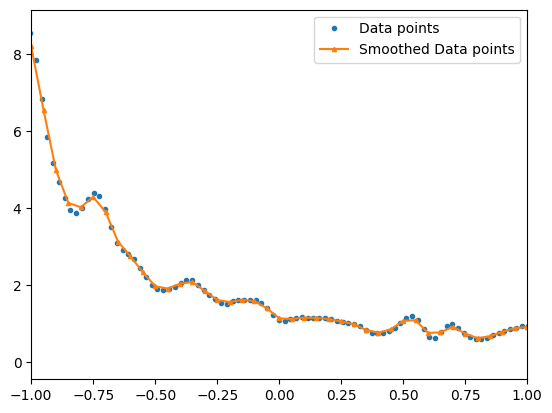

In [8]:
plt.plot(df["energy"], df["TDOS_up"], marker='o', linestyle="None", label='Data points', markersize=3)  # サンプルデータをプロット
plt.plot(df_ip["energy_ip"], df_ip["TDOS_up_ip"], marker='^', linestyle="-", markersize=3, label='Smoothed Data points')
plt.xlim(-1, 1)
plt.legend()
plt.show()

In [24]:
def calc_spin_pol(df_ip):
    selected_values = df_ip.loc[round(df_ip["energy_ip"], 2) == 0, ["TDOS_up_ip", "TDOS_down_ip"]]
    sp_pol = (selected_values.values[0][0]+selected_values.values[0][1])/(selected_values.values[0][0]-selected_values.values[0][1])
    return sp_pol

In [31]:
sp_pol_list=[]
for DOSfile in TDOS_list:
    df, df_ip = DOS_ip(f"./TDOS/{DOSfile}", sigma=1)
    # print(DOSfile)
    sp_pol_list.append(calc_spin_pol(df_ip))
# sp_pol_list

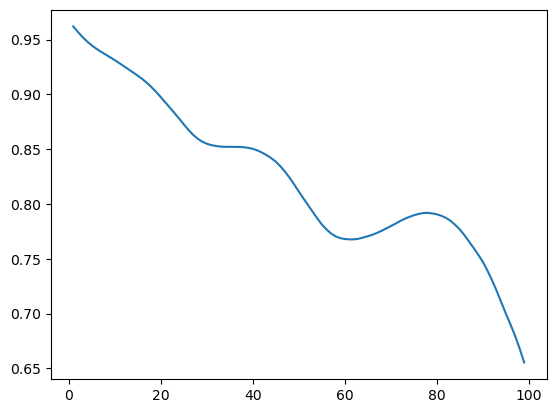

In [32]:
plt.plot(composition, sp_pol_list)

In [89]:
df_csv = pd.DataFrame(np.array([composition, sp_pol_list]).T, columns=["Ga_composition", "spin_polalization"])
df_csv.to_csv("spin_polalization.csv", index=None)